# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [7]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

# Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [5]:
PROB_SPAM = 0.3116

In [6]:
np.log(prob_token_spam)

array([ -4.70537129,  -5.32178468,  -4.98546003, ...,  -9.36380342,
        -8.7005092 , -12.19701676])

# Joint Probability in log format

In [8]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM) 

In [9]:
joint_log_spam[:5]

array([  3.21455605,  13.32484181,  19.20100705, -16.60924848,
        27.93488   ])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [10]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [11]:
joint_log_ham[:5]

array([-11.05045001, -36.83638338, -38.25422025,  -2.70200998,
       -60.16697246])

In [12]:
joint_log_ham.size

1724

# Making Predictions 

## Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>

 <center> OR </center>

<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [13]:
prediction = joint_log_spam > joint_log_ham

In [15]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [16]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠ \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [17]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM) 
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [19]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly:', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly:', numdocs_wrong)

Docs classified correctly: 1672
Docs classified incorrectly: 52


In [20]:
# Accuracy 

correct_docs/len(X_test)

0.9698375870069605

In [22]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 3.02%
Accuracy of the model is 96.98%


# Visualizing the Results

In [26]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

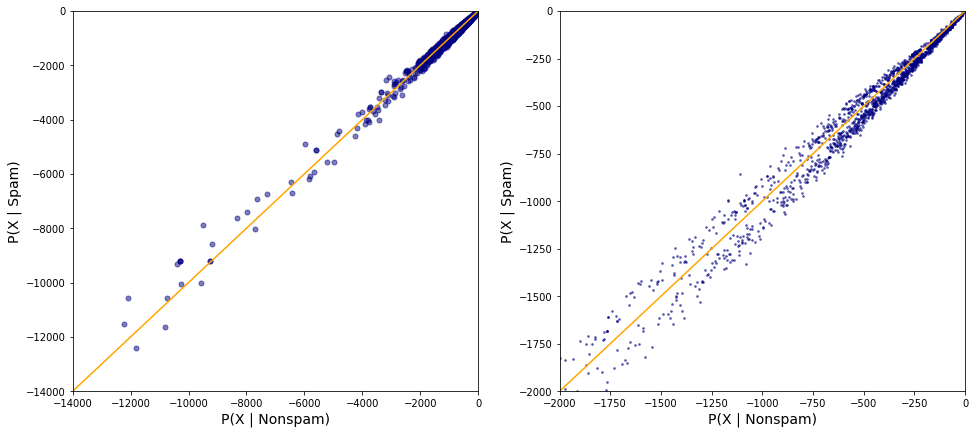

In [33]:
plt.figure(figsize=(16,7))

#Chart Number 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set Scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')


# Chart Number 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set Scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])


plt.scatter(joint_log_ham, joint_log_spam, color = 'navy', alpha = 0.5, s = 3)
plt.plot(linedata, linedata, color = 'orange')


plt.show()



In [34]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

<module 'seaborn' from '/Users/vedantshrivastava/opt/anaconda3/lib/python3.7/site-packages/seaborn/__init__.py'>

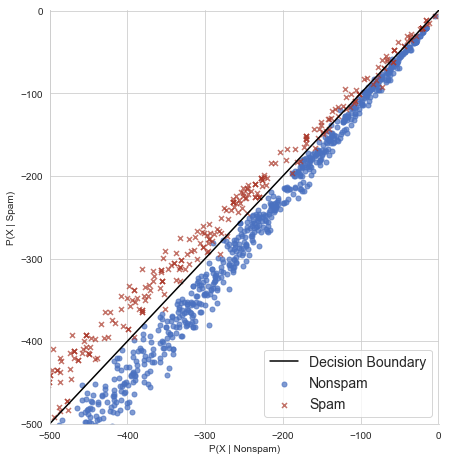

In [50]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size = 6.5, fit_reg = False, legend = False, scatter_kws={'alpha':0.7, 's':25}, hue = labels, markers = ['o','x'], palette = my_colors)

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

sns

# False Positives and False Negatives

In [51]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1165,  559]))

In [52]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

548

In [53]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

11

In [54]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

# Recall Score

In [55]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.04%


# Precision Score

In [58]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.98


# F-Score or F1 Score

In [60]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.95
